In [1]:
import pandas as pd
import plotly.express as px
import os
#from tqdm.notebook import tqdm
import math
import json
import plotly.graph_objs as go

In [2]:
#path = 'recorded-tweets/'
#dir_list = os.listdir(path)

# Introduction

## General information

This Jupyter Book [1] is a project for the course Visualization by Prof. Dr. Bernhard Schmitzer at the University Göttingen. The authors of the text and the visualization in this jupyter book are Hanne Hastedt (26014013), Jonas Lührs (23617618) and Matteo Meier (21222337). This pdf-version is for hand-in reasons only. For the presentation we will use the interactive version via web browser (matteomeier.github.io/visualization). Data sources and other references are marked.

## The #BTW17-Dataset
### Motivation
During election campaigns, especially elections for the federal government, one gets to see plenty of visualizations, mostly bar charts, about the predicted election results. On the evening of the election day and the days after that there are usually even more visualizations about all kinds of aspects of the election. While this is interesting for understanding some of the dynamics of the election at hand, we think, that looking at how Twitter was used during the month before the election will provide some interesting insights. Given the increasing relevance of social networks in political communication understanding how and by whom social media is used in which way is helpful for understanding the dynamics in politics business. Since twitter is, at least in Germany, the social network where most political discussions and communication happens, we choose a dataset, that recorded more than one million tweets during the federal election campaign in 2017 (for the 19th Bundestag) [2]. Nane Kratzke published a paper introducing this dataset [3]. The following description regarding the collection of the dataset is based on this paper. <br>
The #btw17-dataset was recorded from 29th May 2017 until the election day (24th September 2017). The strategy for deciding which tweets to record was made based on accounts of politicians. All politicians, who where a member of the Bundestag at this time as well as some other important people from the parties present in the Bundestag at this time, like Martin Schulz (candidate for chancellor for the <i>SPD</i>), where followed. Additionally relevant politicians from <i>AfD</i> and <i> FDP </i> where followed. Both parties where not present in the 18th German Bundestag, but where likely to get enough votes to be represented in the 19th Bundestag. As can be seen on the following page both parties indeed got enough votes. Based on the 364 followed accounts all tweets concerning them where recorded. As a consequence of this method an important knowledge for evaluating our results later, without unreflective reproduction of a possible bias, is the distribution of the party associated with each of the followed politicians.

In [5]:
f = open('../data/followed-accounts.json')
followed_politicians = json.load(f)
nr_accs_party = [len(followed_politicians[party]) for party in list(followed_politicians.keys())]
parties = list(followed_politicians.keys())

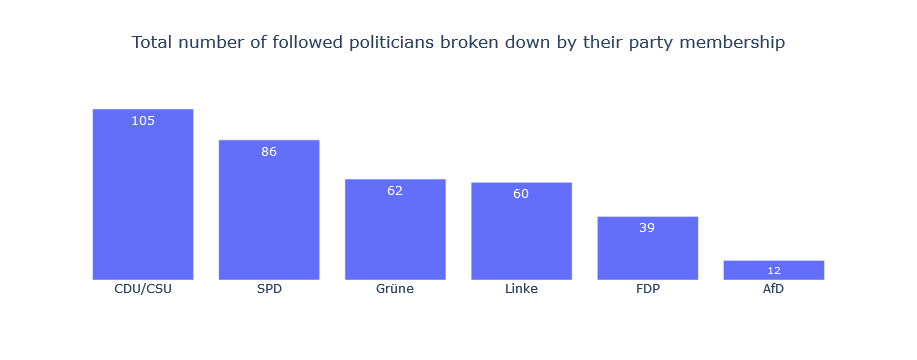

In [6]:
fig = go.Figure(data=[go.Bar(
            x=parties, y=nr_accs_party, 
              text=nr_accs_party,
             textposition='inside'
        )])

fig.update_layout(
    title={'text': 'Total number of followed politicians broken down by their party membership', 
           'y':0.9,
           'x':0.5,
           'xanchor': 'center',
           'yanchor': 'top'},
    plot_bgcolor="white"
)

fig.update_yaxes(showgrid=False, showticklabels=False)

fig.show()

In [7]:
# Closing file
f.close()

Based on this bar chart, that is well suited to show the differences between categories (here parties), we can see the unequal distribution. However, this visualization does not allow to draw conclusions regarding the extend of an account usage. Nonetheless for our further analysis we have to keep this distribution in mind.

As already mentioned, the dataset includes more than 1.2 million tweets, which were posted by around 120.000 different users. The intended use and motivation to create the #btw17-dataset was the lack of such a dataset for German politics and with it the missing basis for other researchers to do more in depth analysis of twitter usage during an election campaign. 
The dataset contains plenty of information for each recorded tweet. For our analysis we will focus on the text of the tweet, user mentioned in a tweet, the account/user that posted the tweet, the used hashtags as well as time of creation. 
The author of the published paper [3] already visualized some basic information about the dataset. In the following some of them will be replicated or for our purpose optimized. Even though some plots have already been done similarly in the paper, we think it will simplify the understanding of the parts of the dataset that are important for our analysis if we show them here as well. Furthermore, we will improve aspects of the figures in the published paper whenever useful. One more advantage of the reproduction is better interactivity with the plots, which allows to grasp the data values more precisely.

### Insights into the dataset
Our first visualization shows the number of tweets per day of the recording period. This allows us to identify important political events during this time period. Since this can be seen as a time series, we use a line chart. Additionally we marked every data point, that was used for creating the chart. This helps to visually distinguish different data points in sections where the line does not change much.  

In [8]:
#results of the code in this cell can be loaded via
output = pd.read_csv('../data/output_dateAndCount.csv', sep=';')

#""" processing to get date and count output
#output = pd.DataFrame()
#
#for index in tqdm(range(len(dir_list))):
#    file = path + dir_list[index]
#    with open(file, 'r') as f:
#        #print(file)
#
#        # get chunk name
#        chunk = file.split('chunk-')[1].split('.')[0]
#
#        # read df
#        df = pd.read_json(f)
#
#        # change datetime to date and lower all hashtags
#        df['created_at'] = pd.to_datetime(df['created_at']).dt.date
#
#        # aggregate dfs and groupby date and hashtag
#        df_agg = pd.DataFrame()
#        df_agg[['date', 'count']] = df.groupby(['created_at'], as_index=False)['id'].count()
#
#        # save to output dataframe
#        output = output.append(df_agg)
#
#output = output.groupby(['date'], as_index=False).sum('count')"""

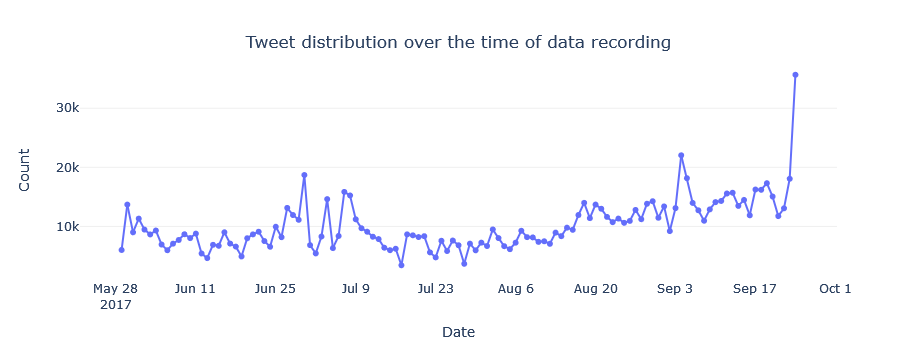

In [12]:
fig = px.line(output[:-1], x='date', y='count', markers=True)

fig.update_layout(plot_bgcolor="white", 
                  title={
                    'text': "Tweet distribution over the time of data recording", 
                    'y':0.9,
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                  hovermode="x unified",
                  )

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='#efefef', zeroline=True, title='Count')
fig.update_xaxes(title='Date')

fig.show()

The resulting plot is in its main components the same as the visualization for this in [2, p. 6]. However, the advantage of our plot is the interactivity of this line chart, that allows to get the specific date of a data point more easily as well as the exact number of tweets on a given day. As noted by the author this plot shows three interesting spikes. They can be dated to the day a law that allows same sex marriages was passed (30th June), the day of the presidential debate (TV Duell) on 4th September and the election day itself on the 24th September.

#### Tweet types
On Twitter users can choose different types of tweets. For the following charts on this page we will use the following terms and definitions. A usual post, that is not in interaction with another post, we denote as status. This is often also referred to as a tweet, but since this can cause misunderstanding we clearly differentiate between them for the introduction of the dataset. Additionally users can interact with statuses (of other users or their own ones) in forms of replies (answers to a status), retweet (sharing of a status without added commentary) and quotes (sharing of a status with an added comment). To get a feeling of the importance of each of the types we show the total number of each type in our dataset. <br>
Nane Kratzke visualized the different tweet types and how common they are in the dataset as well. His visualization can be found on page 7 in [3]. However, he displayed it by using a pie chart. Even though direct labeling was added it is from our perspective not the best choice since it doesn't show the proportions well, thus we decided to use a bar chart showing the total amounts instead.

In [31]:
#results from the code of this cell can be loaded via
output = pd.read_csv('../data/output_entry_type_vorläufig.csv', sep=';')

#""" processing that created the csv-file
#output = pd.DataFrame()
#
#for file in tqdm(dir_list):
#
#  with open(path + file, 'r') as f:
#    df = pd.read_json(f)
#        
#    #get time of creation
#    df['created_at'] = pd.to_datetime(df['created_at']).dt.date
#    df['created_at'] = df['created_at'].apply(str)
#        
#    #whether it's quote?
#    if 'retweeted_status' not in df.keys():
#      df['retweeted_status'] = [0 for i in range(len(df))]
#    df_temp = pd.DataFrame(data={'quote': df['is_quote_status'],#.tolist(),
#                            'retweet': df['retweeted_status'],#.tolist(),
#                            'reply': df['in_reply_to_status_id']
#                            }
#                          )
#    df_temp['created_at'] = df['created_at']
#    df_temp['ID'] = df['id']
#
#    df_temp = df_temp.fillna(0) #to have no NaN for the retweeted status
#    #output
#    df_temp['retweet'] = [1 if ret_st!=0 else 0 for ret_st in df_temp['retweet']] #to just signal whether it was Retweet or not
#    df_temp['quote'] = [1 if quote_st==True else 0 for quote_st in df_temp['quote']] 
#    df_temp['reply'] = [1 if res_st!=0 else 0 for res_st in df_temp['reply']] 
#    #to have explicit attribute for whether it is a status (="normal" tweet)
#    df_temp['status'] = [1 if (q==0 and re==0 and r==0) else 0 for q, r, re in zip(df_temp['retweet'], df_temp['quote'], df_temp['reply'])]
#    
#    output = output.append(df_temp)
#
#
##add additional feature that shows the type of the tweet (not "one-hot-encoding")
#output['type'] = ['T' if(t==1) else 'Q' if((q==r and q==1) or q==1) else 'R' if(r==1 and q==0) else 'A' for r, q, t in zip(output['retweet'], output['quote'], output['status'])]
#
##fix that in some cases a tweet is a retweet and a quote in this case, the entry is counted as a qoute
#output['retweet'] = [0 if((q==r and q==1) or q==1) else 1 for r, q in zip(output['retweet'], output['quote'])]
##note for reply and retweet this was not done, since one would have to decide what is the "supertype" (this may explain why I get to quite different numbers than the authors of the paper)"""      

In [32]:
output_grouped = output.groupby(['created_at'], as_index = False).sum()#['status'])

In [33]:
#create data frame of tweet types
quotes = sum(output_grouped['quote'])
retweets = sum(output_grouped['retweet'])
responses = sum(output_grouped['reply'])
tweets = sum(output_grouped['status'])
total = quotes+retweets+responses+tweets

tweet_types = pd.DataFrame(data={ 'type': ['qoute', 'retweet', 'reply', 'status', 'total'],
                                  'count': [quotes,  retweets, responses, tweets, total]
                                }
)

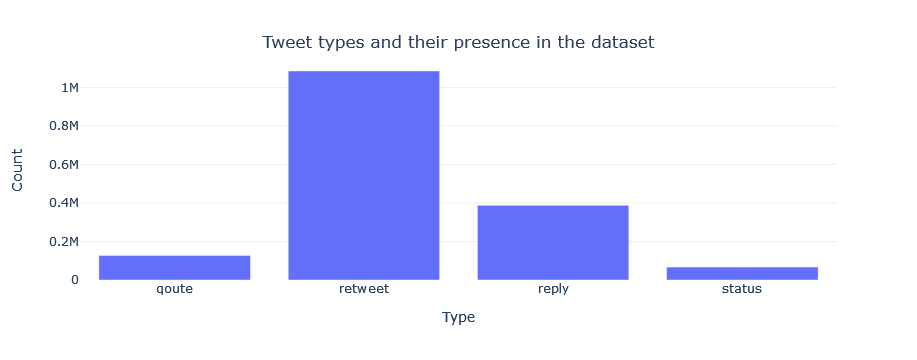

In [18]:
#visualize the tweet types
fig = px.bar(tweet_types[:-1], x='type', y='count')
fig.update_layout(plot_bgcolor="white", 
                  title={
                    'text': "Tweet types and their presence in the dataset", 
                    'y':0.9,
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                  )

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='#efefef', zeroline=True, title='Count')
fig.update_xaxes(title='Type')
fig.show()

The retweet is the most important type in our dataset, while statuses are in contrast not that often used. This is unsurprising since a social network is about interaction between users. But it is again an important information for our later analysis and visualizations. As one may have noticed, the overall sum of the bars extends the above mentioned total number of tweets recorded in the dataset. This can be explained by the possibility to reply to a tweet with a retweet, which can then be counted as both types (retweet and response). In such cases we counted the post as a retweet and a response since we did not find sufficient arguments to decide for one of them. <br>
Additionally we will take a look at the distribution over time, like in our visualization of tweet distributions over the time period of data recording. Since we are again looking at a time series a line chart is the chart type of choice here. This is another plot, that was given already in [3, p, 7]. However, it was quite small which is a problem since one couldn't tell much about the lines for quotes and tweets. Thus we reproduced it here without adding much more to it, gaining the same advantages as the plot 'Tweet distribution over time of data recording'.

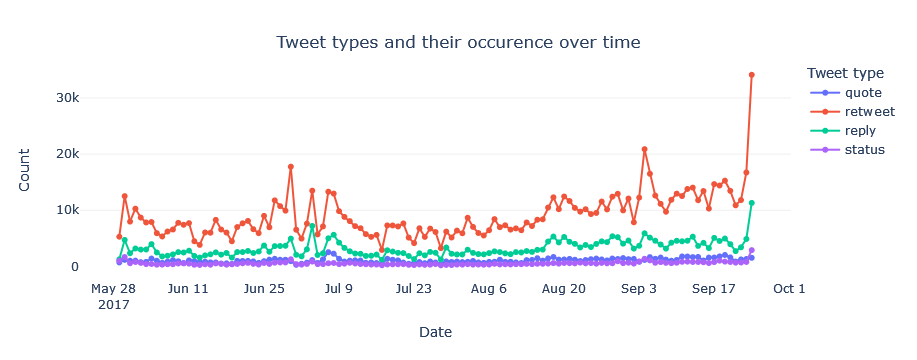

In [34]:
#plot the time series of the different types of tweets in linecharts
fig = px.line(output_grouped[:-2], x='created_at', y=['quote', 'retweet', 'reply', 'status'], markers=True)
fig.update_layout(plot_bgcolor="white", 
                  title={
                    'text': "Tweet types and their occurence over time", 
                    'y':0.9,
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                  hovermode="x unified",
                  legend_title= 'Tweet type'
)

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='#efefef', zeroline=True, title='Count')
fig.update_xaxes(title='Date')

fig.show()

This chart shows that retweet and reply have the same characteristics, which also match the characteristic of the overall amount of tweets per day. This was to be expected because retweets and replies make up the majority of tweets. The amount of quotes per day does not change as much as for retweets and replies, but there is one maximum on 7th and 8th July. At this time the g20 summit took place in Hamburg. The number of statuses is almost constant with small peaks on the 30th June (day where the law allowing same sex marriages was passed), 4th September (TV Duell) and the overall maximum for number of statuses on election day (24th September). 
The most important message, that is conveyed by the two plots above is, that retweets and responses are the most used types, which makes it possibly very suitable for network analysis, for example the usage of hashtags and user mentions.

#### Threads
We will end this introduction by analyzing the distribution of threads over the time period of data recording. Threads can be seen as a possible indicator of times where topics where discussed in more depth. We define threads as a tweet with a chain of replies (at least one reply) each responding to the reply before. All replies and the start tweet must be made from the same user. The tweet, that starts the thread can be a status, but also a reply to another status/reply made by a different user. Thus, threads have at least a length of two tweets, but can be much longer. Given the restricted number of characters in a post, threads allow for a more thorough discussion of a topic, for example to present multiple arguments. Based on this we assume that local maxima in the thread distribution over time indicate an important event during the election campaign. 

In [21]:
#results of the code in this cell can be loaded via
output = pd.read_csv('../data/startingpoint_threadAnalysis.csv', sep=';')

#""" processing, that extracted all relevant information for the thread analysis
#output = pd.DataFrame()#
#
#for file in tqdm(dir_list):
#
#  with open(path + file, 'r') as f:
#    df = pd.read_json(f)
#
#    #get time of creation
#    df['created_at'] = pd.to_datetime(df['created_at']).dt.date
#    df['created_at'] = df['created_at'].apply(str)
#        
#    #get out the interesting columns
#    df_temp = pd.DataFrame(data={'created_at': [elem['created_at'] for elem in df.iloc if not math.isnan(elem['id'])], #df['created_at'].tolist(),
#                            'user_id': [elem['user']['id'] for elem in df.iloc if not math.isnan(elem['id'])], #df['user'].tolist(),
#                            'reply_user': [elem['in_reply_to_user_id'] for elem in df.iloc if not math.isnan(elem['id'])],  #df['in_reply_to_user_id'].tolist(),
#                            'reply_status': [elem['in_reply_to_status_id'] for elem in df.iloc if not math.isnan(elem['id'])], #df['in_reply_to_status_id'].tolist(),
#                            'status_id': [elem['id'] for elem in df.iloc if not math.isnan(elem['id'])] #df['id'].tolist()
#                            }
#                          )
#    
#  output = output.append(df_temp, ignore_index=True)#
#
#output = output.fillna(0)
#output['status_id'] = output['status_id'].astype('int')
#output['reply_status'] = output['reply_status'].astype('int')
#output['reply_user'] = output['reply_user'].astype('int')"""

In [22]:
#filter out all cells where in reply_status_id != 0.
subdf = output[output['reply_status']!=0]

In [23]:
#if I reply to myself = thread
subdf2 = subdf[subdf['user_id']==subdf['reply_user']]
#only around 13.000 posts that are part of threads

In [24]:
#add column for whether it is a thread or not
output['thread_status'] = [0 for i in range(len(output['status_id']))]

In [25]:
status_ala = [] # statuses that where already looked at
i = 0
for elem in subdf2.iloc:
  current_status = elem
  status_id_replied_to = current_status['reply_status'] #id of the tweet that was replied to
  #search for the top tweet must be made on the output df, since this doesn't have a reply id
  #i += 1
  #print(i)
  if status_id_replied_to not in status_ala:
    prev_status = output[output['status_id']==status_id_replied_to] #tweet that was relied to
    #check whether it replied to someone at all

    if len(prev_status)==0: 
      continue
    if int(prev_status['reply_status']) == 0: #tweet didn't reply to anything, but has at least one reply from same user
      output.loc[output[output['status_id'] == status_id_replied_to].index[0], 'thread_status'] = 1

    elif int(elem['user_id']) != int(prev_status['reply_user']): #thread was a response to a tweet from a different user
      output.loc[output[output['status_id'] == status_id_replied_to].index[0], 'thread_status'] = 1

    else: #status replied to something postes by the same user
      continue_bol = True #True as long as current tweet still has a predecessor in the thread, if not then set to zero
      #find_reply_status_id
      status_ala.append(status_id_replied_to)
      current_status = prev_status
      status_id_replied_to = int(current_status['reply_status']) #id of the tweet that was replied to

      while(continue_bol and status_id_replied_to not in status_ala):
        #find status itself
        prev_status = output[output['status_id']==status_id_replied_to] #tweet that was replied to
        #check whether it replied to someone else

        if len(prev_status)==0: #in case of emtpy prev_statuses (possibly because not all tweets are captured...)
          #output.loc[output[output['status_id'] == status_id_replied_to].index[0], 'threat_status'] = 1
          continue_bol = False

        elif int(prev_status['reply_status']) == 0: #didn't reply to anyone
          output.loc[output[output['status_id'] == status_id_replied_to].index[0], 'thread_status'] = 1
          continue_bol = False

        elif int(current_status['user_id']) != int(prev_status['reply_user']): #didn't reply to same user (=end of thread)
          output.loc[output[output['status_id'] == status_id_replied_to].index[0], 'thread_status'] = 1
          continue_bol = False

        # at some point one of the conditions will be fullfilled and the loop will end
        current_status = prev_status
        if len(current_status)==0: 
          continue_bol = False
        else:
          status_id_replied_to = int(current_status['reply_status']) #id of the tweet that was replied to
 

In [26]:
output_grouped = output.groupby(['created_at']).sum()

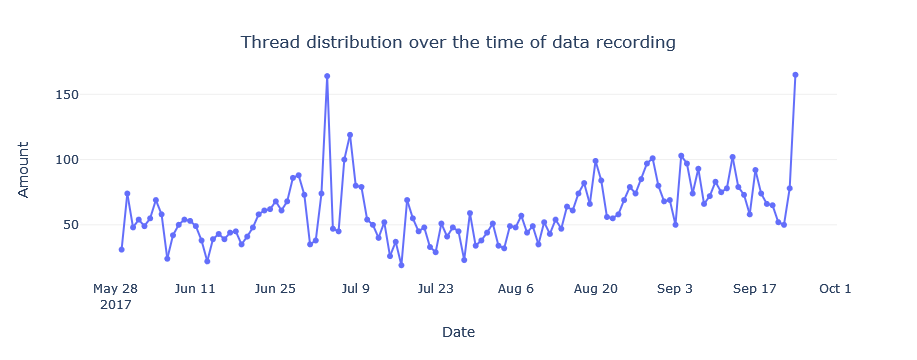

In [29]:
#plot the time series
fig = px.line(output_grouped[:-1], x=output_grouped.index[:-1], y='thread_status', markers=True)

fig.update_layout(plot_bgcolor="white", 
                  title={
                    'text': "Thread distribution over the time of data recording", 
                    'y':0.9,
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                    hovermode="x unified",
                  )

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='#efefef', zeroline=True, title='Amount')
fig.update_xaxes(title='Date')
fig.show()

First of all, the number of threads was rather small (in total around 13.000). However, it can be seen, that there are two big peaks around 4th July and 24th September and a tendency for a slower increase from mid of august to september (which might be due to the summer break). Whereas the 24th of September was a local maxima in the plot 'Tweet distribution over the time of data recording', the 4th of July wasn't. Our research did not yield a concrete event that could explain this spike right away. The 4th of July was right before the start of the g20 summit, that took place in Hamburg in 2017. Unlike in the visualization 'Tweet distribution over the time of data recording' the maximum for the tv debate is not really visible. From this we can already conclude, that the TV debate may have been an important event, but not an on twitter thoroughly discussed topic and did not produce such topics as well. Some of the smaller local maxima in the plot above may be due to a certain topic being discussed, but one has to be careful with those since the number of threads is quite small, which usually yields more wiggly line charts.

Based on this introduction we can already suspect, that there were four important events during the data recording: Passing of a law allowing same sex marriage, g20 summit in Hamburg, tv debate and the election itself. <br>
On the following pages we will first present the election results to give some more context to our dataset, especially its context in the real world. After that we do some more analysis of the tweets with respect to their topics, sentiments and some basic network analysis. 